In [1]:
import pandas as pd
import visuals as vs
import data_preprocessing as dp
%config InlineBackend.figure_format='retina'

In [2]:
data = pd.read_csv('DiabetesClassificationDataset2022.csv')
data.head()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1


In [3]:
data.shape

(79159, 88)

In [4]:
data.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,61223.000000,61223.000000,...,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.446715,0.391831,10.835017,25.465505,8.487987,0.0,0.771686,0.795767,...,42.058748,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.700000,23.875433,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.029903,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.400000,33.420162,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

In [6]:
# drop the two ID columns
data.drop(labels=['encounter_id', 'hospital_id'], axis=1, inplace=True)

In [7]:
data.isnull().sum().sort_values(ascending=False).head(44)

h1_bilirubin_max        72849
h1_bilirubin_min        72849
h1_albumin_max          72271
h1_albumin_min          72271
h1_lactate_min          71985
h1_lactate_max          71985
h1_pao2fio2ratio_max    68816
h1_pao2fio2ratio_min    68816
h1_arterial_ph_min      65389
h1_arterial_ph_max      65389
h1_arterial_pco2_min    65287
h1_arterial_pco2_max    65287
h1_arterial_po2_max     65142
h1_arterial_po2_min     65142
h1_hco3_max             64351
h1_hco3_min             64351
h1_calcium_max          63963
h1_calcium_min          63963
h1_bun_max              63406
h1_bun_min              63406
h1_creatinine_min       63275
h1_creatinine_max       63275
h1_hematocrit_min       62543
h1_hematocrit_max       62543
h1_sodium_min           61396
h1_sodium_max           61396
paco2_apache            60619
d1_lactate_min          57809
d1_lactate_max          57809
d1_pao2fio2ratio_min    56576
d1_pao2fio2ratio_max    56576
d1_arterial_po2_min     50826
d1_arterial_po2_max     50826
bilirubin_

In [8]:
num_of_columns_to_drop = 44
columns_to_drop_1 = list(data.isnull().sum().sort_values(ascending=False).head(num_of_columns_to_drop).index.values)

In [9]:
data.drop(labels=columns_to_drop_1, axis=1, inplace=True)

In [10]:
data.shape

(79159, 42)

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(38582, 42)

In [13]:
data.isnull().sum().sum()

0

In [14]:
features_raw = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [15]:
numeric_features_list = dp.get_float_features(features_raw)
numeric_features_list

['age',
 'height',
 'weight',
 'bmi',
 'h1_temp_max',
 'h1_temp_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'wbc_apache',
 'd1_heartrate_max',
 'heart_rate_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'creatinine_apache',
 'h1_spo2_max',
 'map_apache']

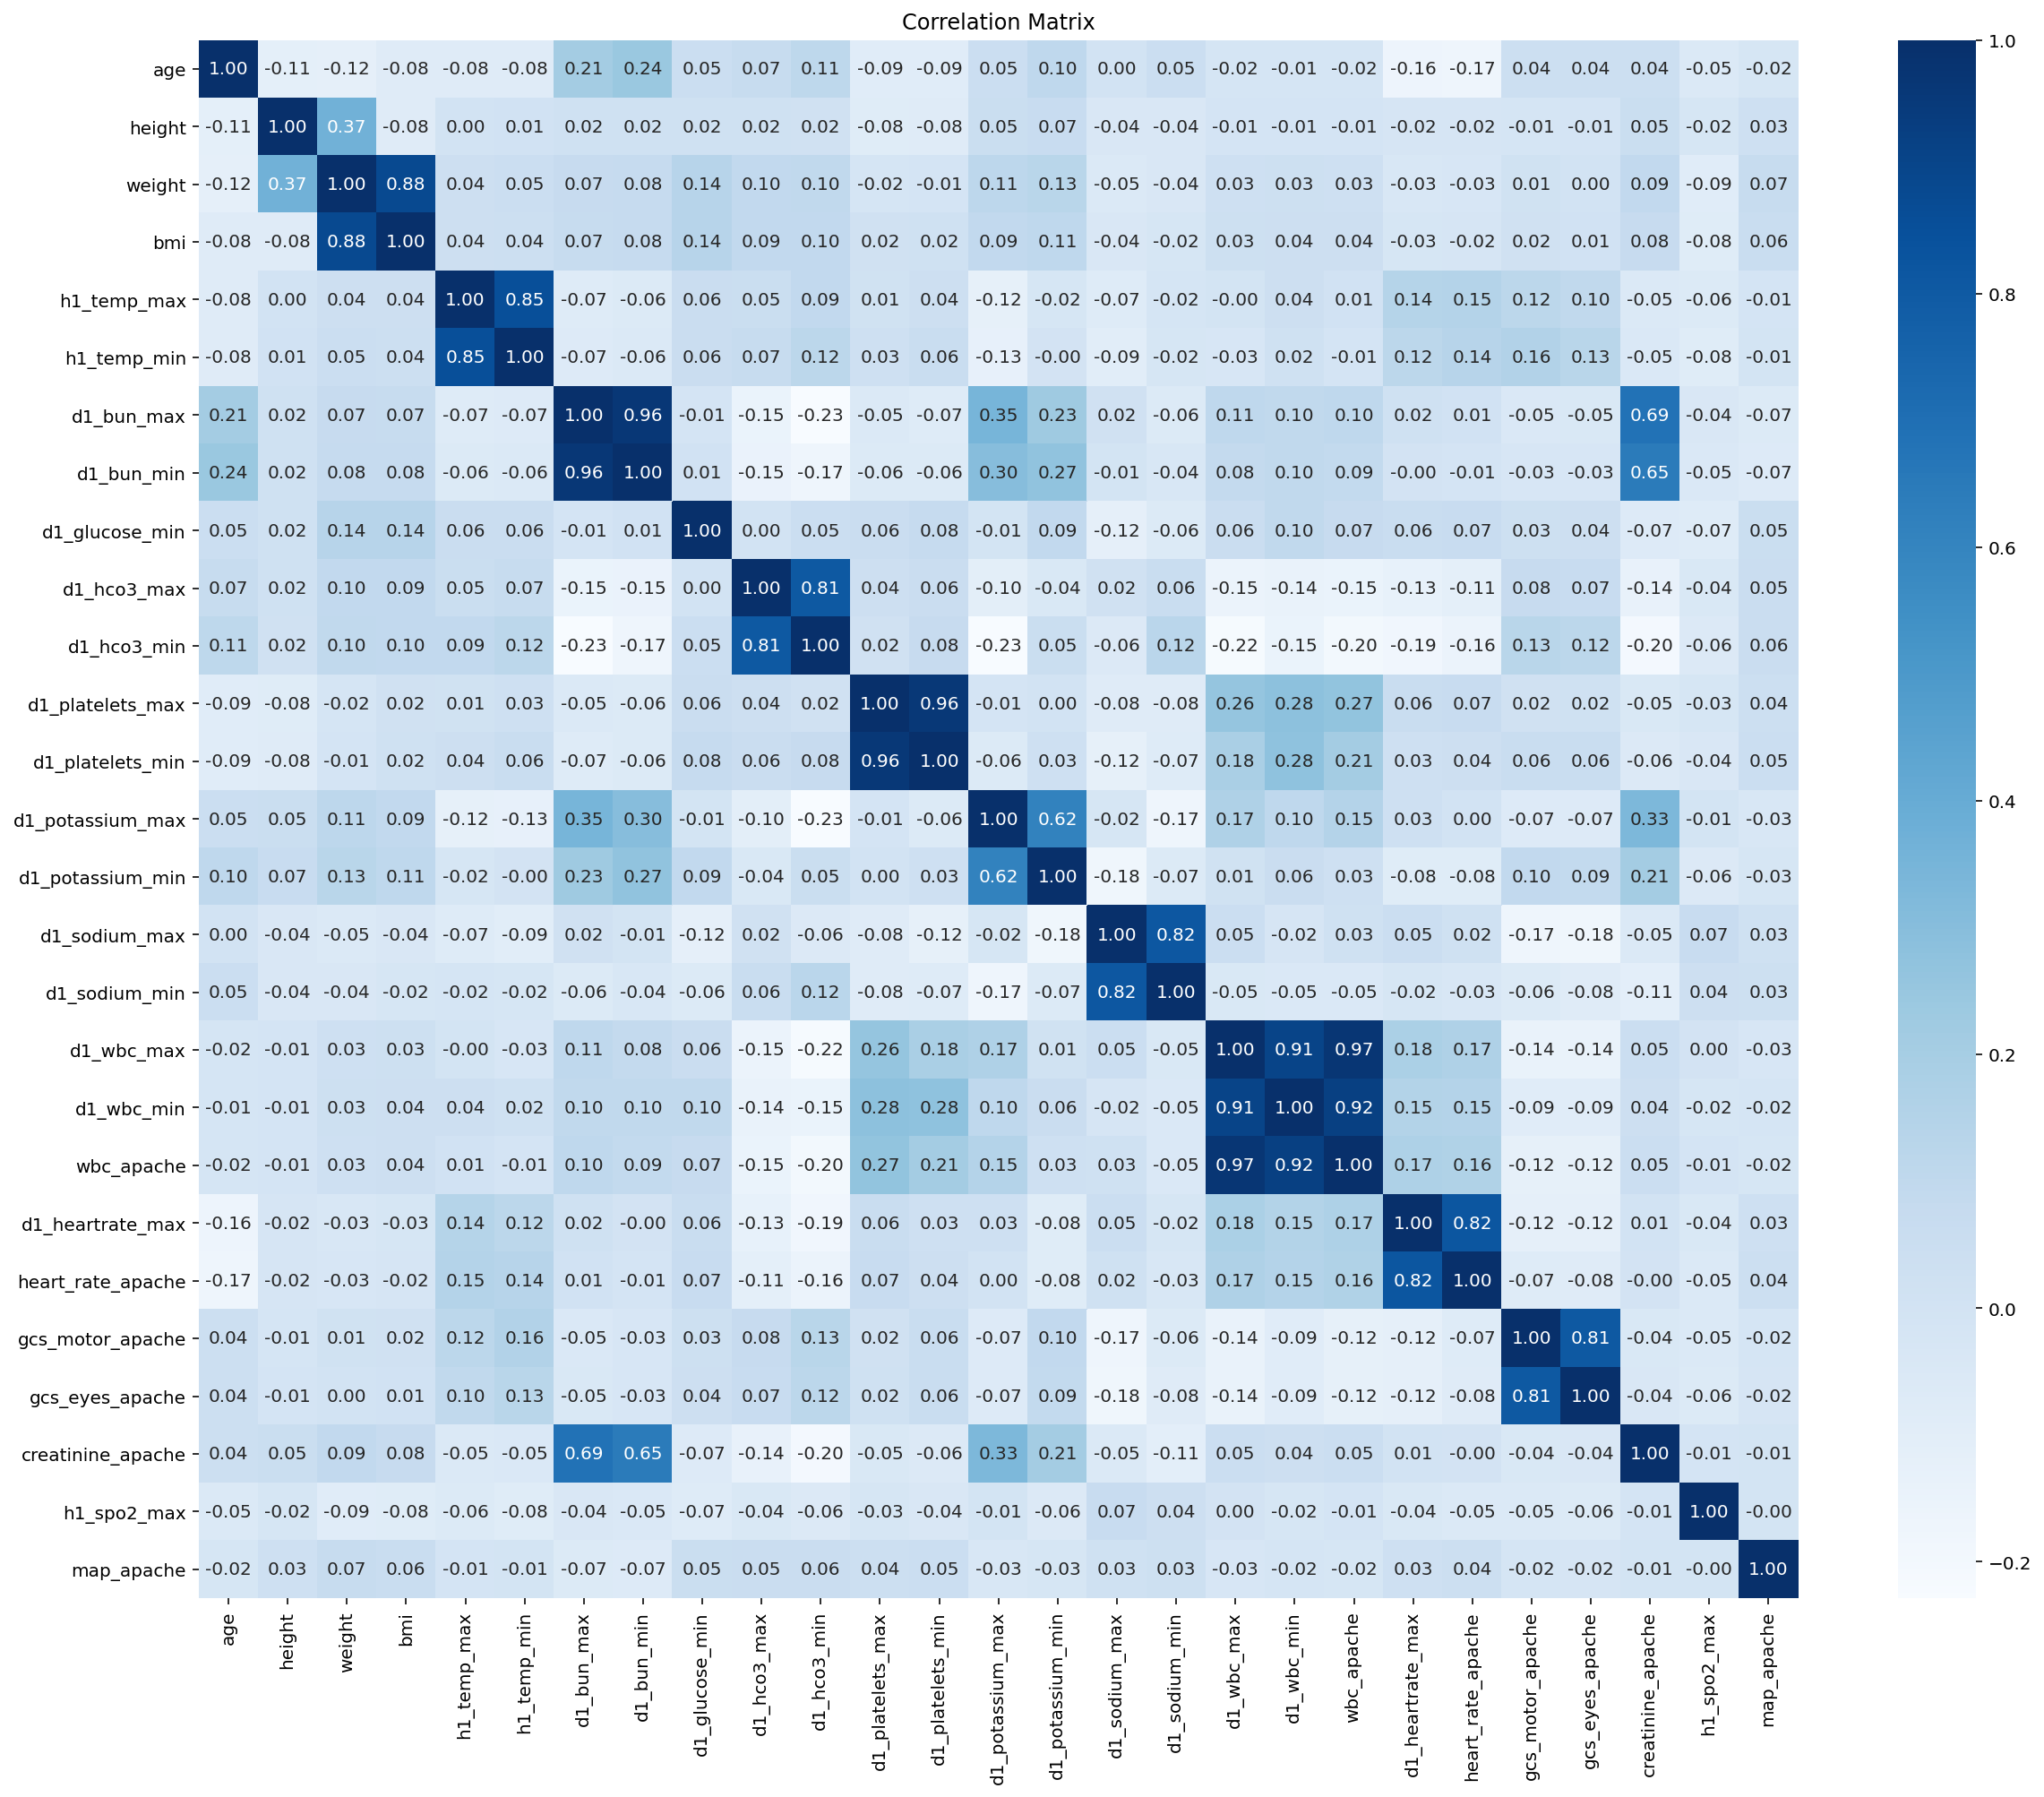

In [16]:
data[numeric_features_list].corr()
data[numeric_features_list].corr().unstack()

vs.plot_correlation_matrix(data[numeric_features_list], figsize=(20, 16), threshold=-1)

In [17]:
categorical_features_list = dp.get_categorical_features(features_raw)
categorical_features_list

['gender', 'ethnicity', 'icu_type']

In [18]:
binary_features = dp.get_binary_features(features_raw)
binary_features

['elective_surgery',
 'intubated_apache',
 'aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'ventilated_apache']

In [19]:
integer_features_list = dp.get_integer_features(features_raw)
integer_features_list

[]

In [20]:
encoded_cat_features = pd.get_dummies(features_raw[categorical_features_list])
encoded_cat_features

,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79148,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
79151,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
79154,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
79155,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [21]:
features_encoded = pd.concat([features_raw, encoded_cat_features], axis=1)

In [22]:
features_encoded.drop(categorical_features_list, axis=1, inplace=True)

In [23]:
features_encoded.shape

(38582, 54)

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(f_classif, k=20)

X_new = kbest.fit_transform(features_encoded, target)
X_new.shape


C:\IDE\Anaconda3\envs\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\IDE\Anaconda3\envs\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(38582, 20)

In [25]:
print(kbest.get_feature_names_out())

['age' 'weight' 'bmi' 'd1_bun_max' 'd1_bun_min' 'd1_glucose_min'
 'd1_hco3_min' 'd1_platelets_min' 'd1_potassium_max' 'd1_potassium_min'
 'd1_sodium_min' 'd1_heartrate_max' 'gcs_eyes_apache' 'creatinine_apache'
 'ethnicity_African American' 'ethnicity_Caucasian'
 'ethnicity_Native American' 'icu_type_CSICU' 'icu_type_Neuro ICU'
 'icu_type_SICU']


In [26]:
features_best = pd.DataFrame(X_new, columns = kbest.get_feature_names_out())
features_best.shape

(38582, 20)

In [27]:
target.shape

(38582,)

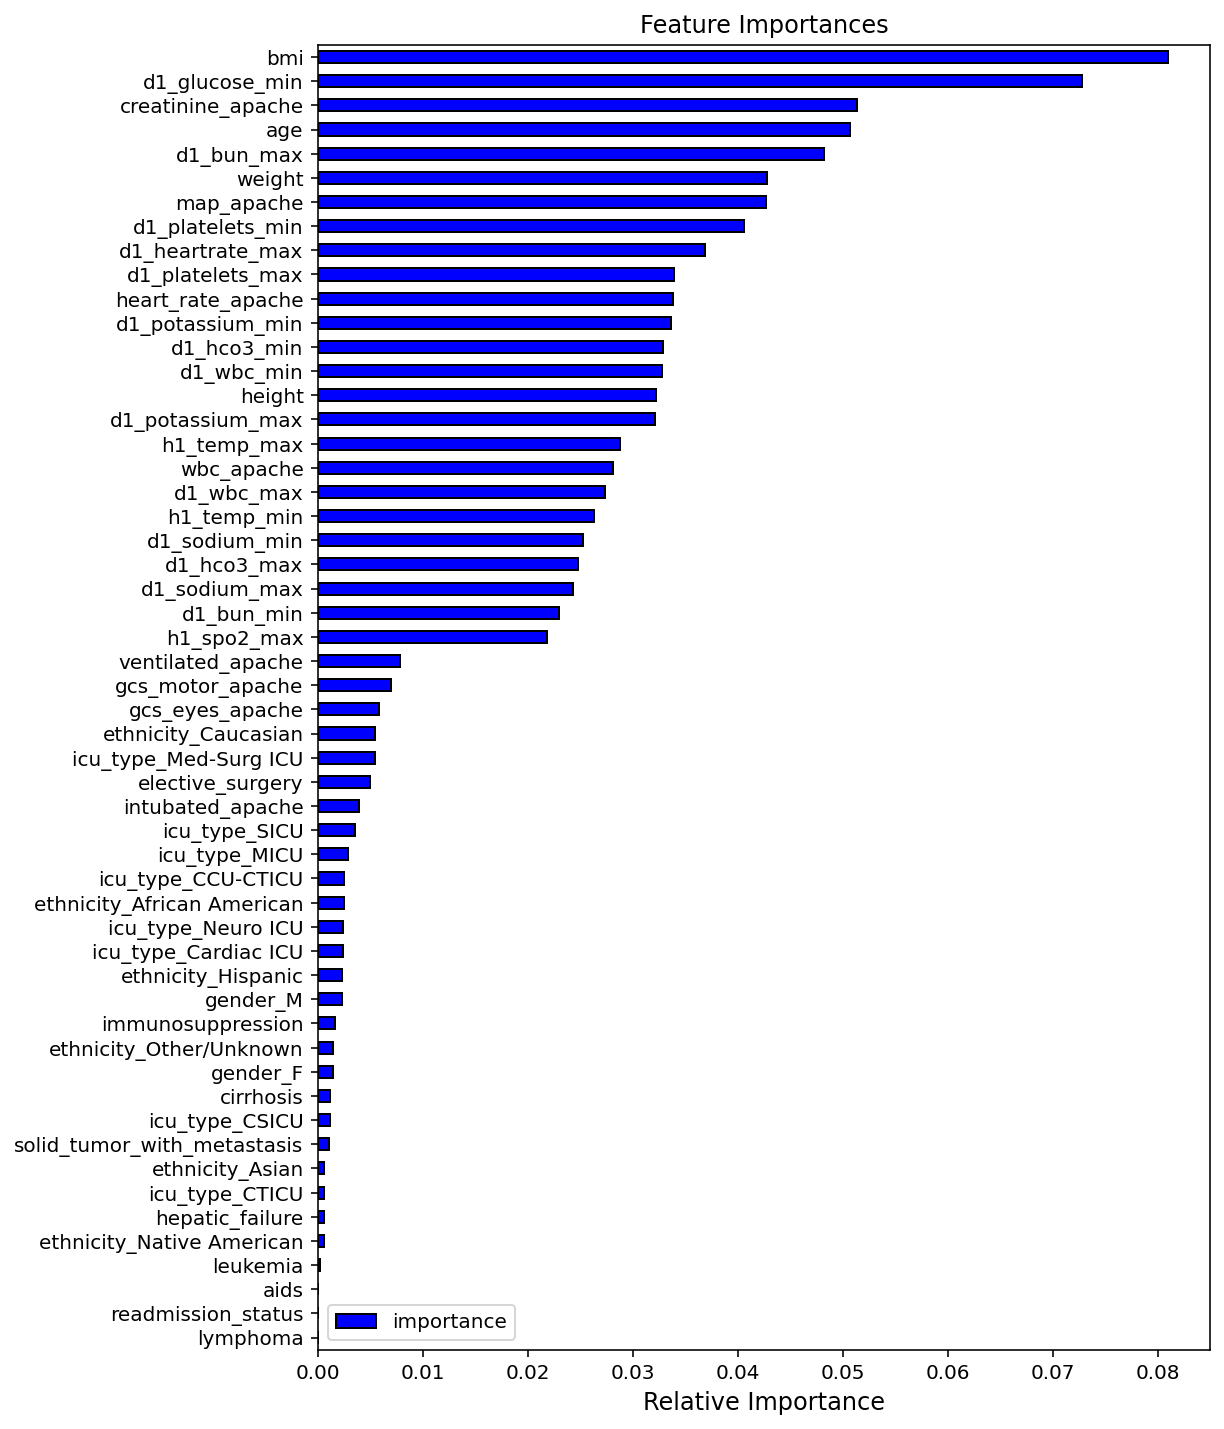

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0, criterion='entropy')

dtc.fit(features_encoded, target)

# TODO: Extract the feature importances using .feature_importances_ 
importances = dtc.feature_importances_

# Plot
vs.plot_feature_importance(features_encoded.columns, importances, (8, 12))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=target)

In [30]:
import classification_modeling as cm

cm.set_beta_f_score(1)

naive_accuracy, naive_precision, naive_recall, naive_fscore = cm.calculate_naive_evaluation_mertics(target)

Naive Predictor: [Accuracy score: 0.3629, F-score: 0.4159]


GradientBoostingClassifier trained on 308 samples.
GradientBoostingClassifier trained on 3086 samples.
GradientBoostingClassifier trained on 30865 samples.
DecisionTreeClassifier trained on 308 samples.
DecisionTreeClassifier trained on 3086 samples.
DecisionTreeClassifier trained on 30865 samples.
RandomForestClassifier trained on 308 samples.
RandomForestClassifier trained on 3086 samples.
RandomForestClassifier trained on 30865 samples.


d:\github-repos\freelancer-com-diabetes-mellitus\visuals.py:130: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


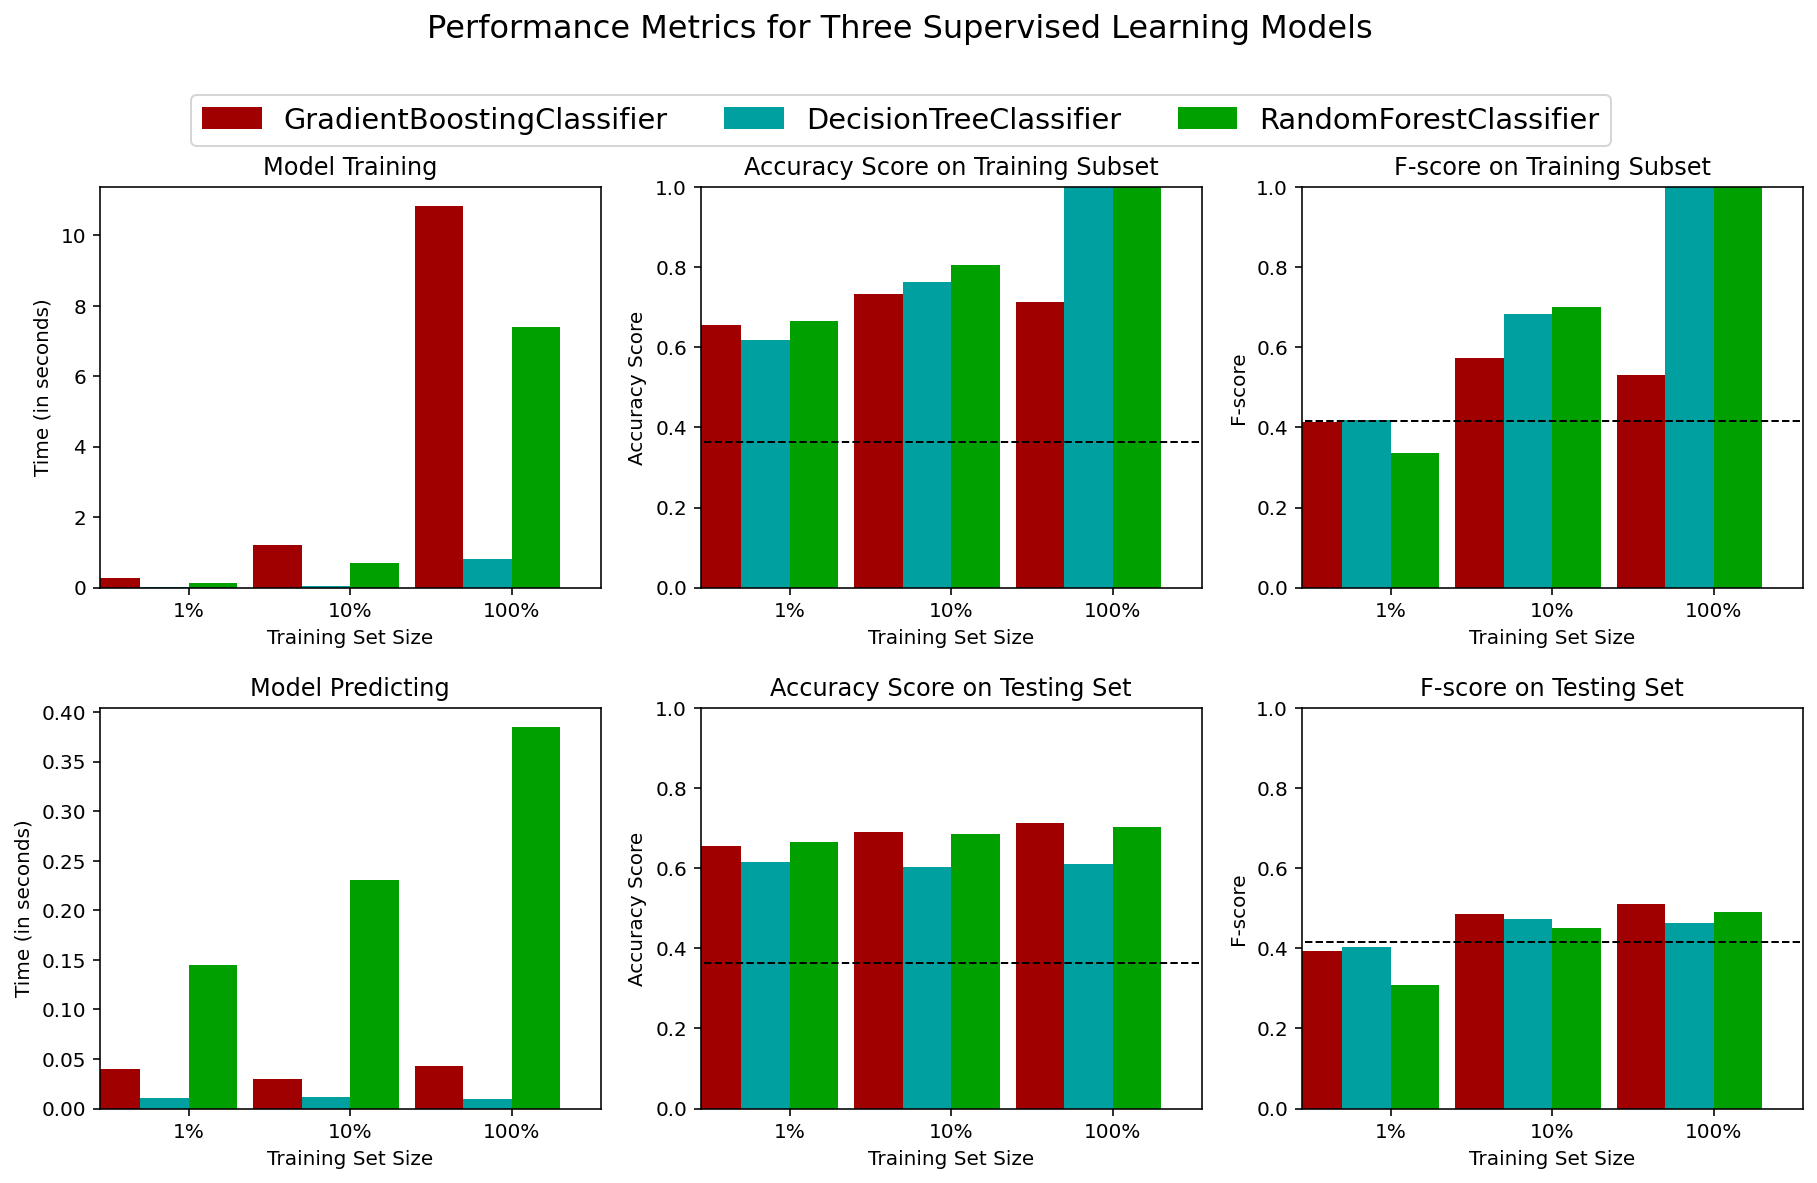

In [31]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

# # TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state=0)
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

models = [clf_A, clf_B, clf_C]

cm.train_and_compare_models(models, X_train, y_train, X_test, y_test, naive_accuracy, naive_fscore)

In [32]:
# TODO: Initialize the best unoptimized classifier
clf = GradientBoostingClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# Hyperparameters for GradientBoostingClassifier
parameters = {
        "n_estimators": [10, 100, 200],
        #"learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    }

# optimize the classifier

grid_obj = cm.optimize_model(clf, parameters, X_train, y_train, X_test, y_test)

best_clf = grid_obj.best_estimator_

best_clf

Unoptimized model
------
Accuracy score on testing data: 0.7117
F-score on testing data: 0.5102

Optimized Model
------
Final accuracy score on the testing data: 0.7121
Final F-score on the testing data: 0.5232


GradientBoostingClassifier(n_estimators=200, random_state=0)